# GSM-VED: Visco-elasto-damage 

In [1]:
%matplotlib widget
import matplotlib.pylab as plt
import sympy as sp
import numpy as np
from IPython.display import display, Math, Markdown
from bmcs_matmod.api import GSM1D_VED
gsm = GSM1D_VED()
display(Markdown(gsm.latex_potentials()))

## class GSM1D_VED
### Helmholtz free energy
$$F = \frac{E^{2} \left(1 - \omega\right) \left(\varepsilon - \varepsilon^\mathrm{ve}\right)^{2} + z^{2}}{2 E}$$
$$\left\{ Y : \frac{E \left(\varepsilon - \varepsilon^\mathrm{ve}\right)^{2}}{2}, \  Z : \frac{z}{E}, \  \sigma^\mathrm{ve} : - E \left(\omega - 1\right) \left(\varepsilon - \varepsilon^\mathrm{ve}\right)\right\}$$
#### Mechanical dissipation
$$\gamma_{\mathrm{mech}} = Y \dot{\omega} - Z \dot{z} + \sigma^\mathrm{ve} \dot{\varepsilon^\mathrm{ve}}$$
#### Lagrangian
$$\mathcal{L} = - Y \dot{\omega} + Z \dot{z} - \sigma^\mathrm{ve} \dot{\varepsilon^\mathrm{ve}} - \dot{\lambda}_{0} \left(\dot{\varepsilon^\mathrm{ve}} - \frac{\sigma^\mathrm{ve}}{\eta_\mathrm{ve} \left(1 - \omega\right)}\right) - \lambda_{\mathrm{\phi}} \left(- \frac{S \left(\frac{Y}{S}\right)^{r + 1} \left(1 - \omega\right)^{c} \left|{\dot{\varepsilon^\mathrm{ve}} - \dot{\varepsilon}}\right|}{r + 1} + Z + \varepsilon_{0} - \left|{\varepsilon}\right|\right)$$
#### Residuum
$$\frac{\partial \mathcal{L}}{\partial \mathcal{S}} = \left[\begin{matrix}- \dot{\varepsilon^\mathrm{ve}} + \frac{\dot{\lambda}_{0}}{\eta_\mathrm{ve} \left(1 - \omega\right)}\\\frac{S \lambda_{\mathrm{\phi}} \left(\frac{Y}{S}\right)^{r + 1} \left(1 - \omega\right)^{c} \left|{\dot{\varepsilon^\mathrm{ve}} - \dot{\varepsilon}}\right|}{Y} - \dot{\omega}\\\dot{z} - \lambda_{\mathrm{\phi}}\\- \dot{\varepsilon^\mathrm{ve}} + \frac{\sigma^\mathrm{ve}}{\eta_\mathrm{ve} \left(1 - \omega\right)}\\- Z - \varepsilon_{0} + \left|{\varepsilon}\right|\end{matrix}\right] = 0$$
### Legendre transform
#### Strain substitutions in dissipative terms
$$\left\{ \varepsilon : \frac{E \omega \varepsilon^\mathrm{ve} - E \varepsilon^\mathrm{ve} - \sigma}{E \left(\omega - 1\right)}\right\}$$
$$\left\{ \dot{\varepsilon} : \frac{E \omega^{2} \dot{\varepsilon^\mathrm{ve}} - 2 E \omega \dot{\varepsilon^\mathrm{ve}} + E \dot{\varepsilon^\mathrm{ve}} - \omega \dot{\sigma} + \sigma \dot{\omega} + \dot{\sigma}}{E \left(\omega^{2} - 2 \omega + 1\right)}\right\}$$
### Gibbs free energy
$$G = \sigma \varepsilon- \left[\frac{E^{2} \left(1 - \omega\right) \left(\varepsilon - \varepsilon^\mathrm{ve}\right)^{2} + z^{2}}{2 E}\right] $$
#### Gibbs free energy after strain substitutions
$$G = \frac{2 E \omega \sigma \varepsilon^\mathrm{ve} - 2 E \sigma \varepsilon^\mathrm{ve} - \omega z^{2} - \sigma^{2} + z^{2}}{2 E \left(\omega - 1\right)}$$
$$\left\{ Y : \frac{\sigma^{2}}{2 E \left(\omega^{2} - 2 \omega + 1\right)}, \  Z : \frac{z}{E}, \  \sigma^\mathrm{ve} : \sigma\right\}$$
#### Mechanical dissipation
$$\gamma_{\mathrm{mech}} = Y \dot{\omega} - Z \dot{z} + \sigma^\mathrm{ve} \dot{\varepsilon^\mathrm{ve}}$$
#### Lagrangian
$$\mathcal{L} = - Y \dot{\omega} + Z \dot{z} - \sigma^\mathrm{ve} \dot{\varepsilon^\mathrm{ve}} - \dot{\lambda}_{0} \left(\dot{\varepsilon^\mathrm{ve}} + \frac{\sigma^\mathrm{ve}}{\eta_\mathrm{ve} \left(\omega - 1\right)}\right) - \lambda_{\mathrm{\phi}} \left(- \frac{Y \left(\frac{Y}{S}\right)^{r} \left(1 - \omega\right)^{c} \left|{\frac{- \omega \dot{\sigma} + \sigma \dot{\omega} + \dot{\sigma}}{\omega^{2} - 2 \omega + 1}}\right|}{E \left(r + 1\right)} - \frac{- E \left(Z + \varepsilon_{0}\right) + \left|{\frac{- E \omega \varepsilon^\mathrm{ve} + E \varepsilon^\mathrm{ve} + \sigma}{\omega - 1}}\right|}{E}\right)$$
#### Residuum
$$\frac{\partial \mathcal{L}}{\partial \mathcal{S}} = \left[\begin{matrix}- \dot{\varepsilon^\mathrm{ve}} - \frac{\dot{\lambda}_{0}}{\eta_\mathrm{ve} \left(\omega - 1\right)}\\- \dot{\omega} - \lambda_{\mathrm{\phi}} \left(- \frac{r \left(\frac{Y}{S}\right)^{r} \left(1 - \omega\right)^{c} \left|{\frac{- \omega \dot{\sigma} + \sigma \dot{\omega} + \dot{\sigma}}{\omega^{2} - 2 \omega + 1}}\right|}{E \left(r + 1\right)} - \frac{\left(\frac{Y}{S}\right)^{r} \left(1 - \omega\right)^{c} \left|{\frac{- \omega \dot{\sigma} + \sigma \dot{\omega} + \dot{\sigma}}{\omega^{2} - 2 \omega + 1}}\right|}{E \left(r + 1\right)}\right)\\\dot{z} - \lambda_{\mathrm{\phi}}\\- \dot{\varepsilon^\mathrm{ve}} - \frac{\sigma^\mathrm{ve}}{\eta_\mathrm{ve} \left(\omega - 1\right)}\\\frac{- E \left(Z + \varepsilon_{0}\right) + \left|{\frac{- E \omega \varepsilon^\mathrm{ve} + E \varepsilon^\mathrm{ve} + \sigma}{\omega - 1}}\right|}{E}\end{matrix}\right] = 0$$

## Linearly ascending loading

In [6]:
E_val = 30e+3  # Young's modulus in MPa
K_val = 1e+3  # Bulk modulus in MPa
f_c_val = 15 # Strength in MPa
eta_vp_val = 10e+4  # Viscosity in MPa s
eta_ve_val = 10e+4  # Viscosity in MPa s

# mparams = {gsm.E:10, gsm.c:1, gsm.r:1, gsm.S:10, gsm.eps_0:1}

mparams = dict(E=E_val, K=K_val, f_c=f_c_val, S=0.0001, r=1, c=1,
            eps_0=0.001, eta_ve=eta_ve_val, eta_vp=eta_vp_val)

f_time = 10  # Final time in secondsfinal_time = 1
n_t = 151
t_t = np.linspace(0, f_time, n_t)
eps_max = 0.0025
eps_n_t = np.linspace(0, eps_max, n_t)

response = gsm.get_response(eps_n_t, t_t, **mparams)
t_t_ec, eps_ta_ec, sig_ta_ec, Eps_t_ec, Sig_t_ec, iter_t_ec, lam_t_ec, (d_t_t_ec, d_eps_ta_ec) = response
eps_t_ec = eps_ta_ec[:, 0]
sig_t_ec = sig_ta_ec[:, 0, 0]
# use the stress history to reproduce the response using stress control
response = gsm.get_G_response(sig_t_ec, t_t, **mparams)
t_t_sc, eps_ta_sc, sig_ta_sc, Eps_t_sc, Sig_t_sc, iter_t_sc, lam_t_sc, (d_t_t_sc, d_eps_ta_sc) = response
iter_t = iter_t_sc[:, 0]
eps_t_sc = eps_ta_sc[:, 0, 0]
sig_t_sc = sig_ta_sc[:, 0]
eps_t_ec.shape, sig_t_ec.shape, eps_t_sc.shape, sig_t_sc.shape

In [9]:
eps_v_ec, omega_t_ec, z_t_ec = Eps_t_ec[:, 0, :].T
eps_v_sc, omega_t_sc, z_t_sc = Eps_t_sc[:, 0, :].T
(eps_v_ec.shape, omega_t_ec.shape, z_t_ec.shape, eps_v_sc.shape, omega_t_sc.shape, z_t_sc.shape)

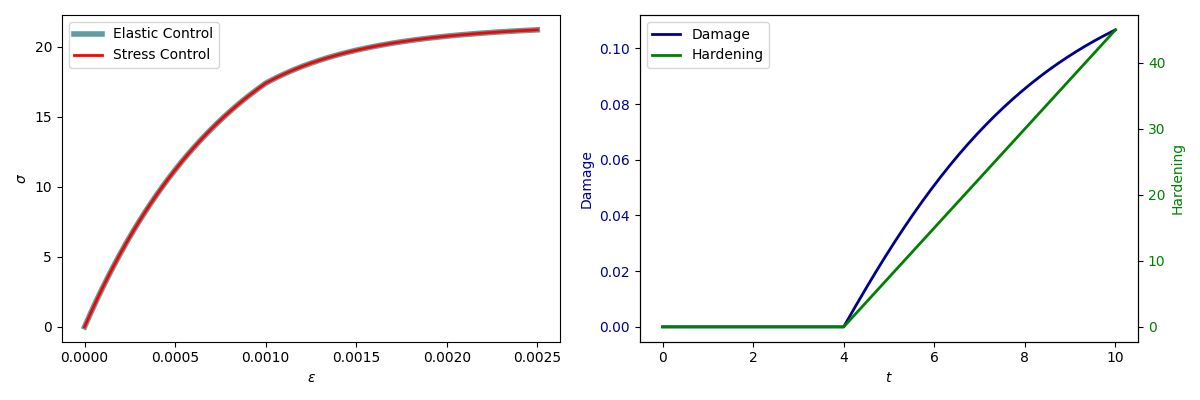

In [11]:
fig, (ax_sig, ax_eps) = plt.subplots(1, 2, figsize=(12, 4))

# Left: Stress–strain curves (elastic control and stress control)
ax_sig.plot(eps_t_ec, sig_t_ec, color='cadetblue', lw=4, label='Elastic Control')
ax_sig.plot(eps_t_sc, sig_t_sc, color='red', lw=2, label='Stress Control')
ax_sig.set_xlabel(r'$\varepsilon$')
ax_sig.set_ylabel(r'$\sigma$')
ax_sig.legend()

# Right: Damage and hardening profiles
ax_eps.plot(t_t_ec, omega_t_ec, color='darkblue', lw=2, label='Damage')
ax_eps.set_xlabel(r'$t$')
ax_eps.set_ylabel('Damage', color='darkblue')
ax_eps.tick_params(axis='y', labelcolor='darkblue')

# Twin axis for hardening (z)
ax_hard = ax_eps.twinx()
ax_hard.plot(t_t_ec, z_t_ec, color='green', lw=2, label='Hardening')
ax_hard.set_ylabel('Hardening', color='green')
ax_hard.tick_params(axis='y', labelcolor='green')

# Combine legends from both axes
lines1, labels1 = ax_eps.get_legend_handles_labels()
lines2, labels2 = ax_hard.get_legend_handles_labels()
ax_eps.legend(lines1 + lines2, labels1 + labels2, loc='best')

plt.tight_layout()
plt.show()
